In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the Cleaned data
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## REMOVE SOME UNNECESSARY COLUMN FROM THE DATASET
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
## THE CLASSES FEATURE HAS ONLY MAINLY TWO CLASS "FIRE" AND "NOT FIRE" BUT IN SOME ROWS IT WRITTEN AS "FIRE "
# MEANS SPACE SO IT CONSIDER IT AS A DIFFERENT CLASS SO SOLVE THIS THING
print("Categories in Classes Feature before:- ")
print(df['Classes'].value_counts())
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
print("\nCategories in Classes Feature after:- ")
print(df['Classes'].value_counts())

Categories in Classes Feature before:- 
Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

Categories in Classes Feature after:- 
Classes
1    137
0    106
Name: count, dtype: int64


In [15]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

<Axes: >

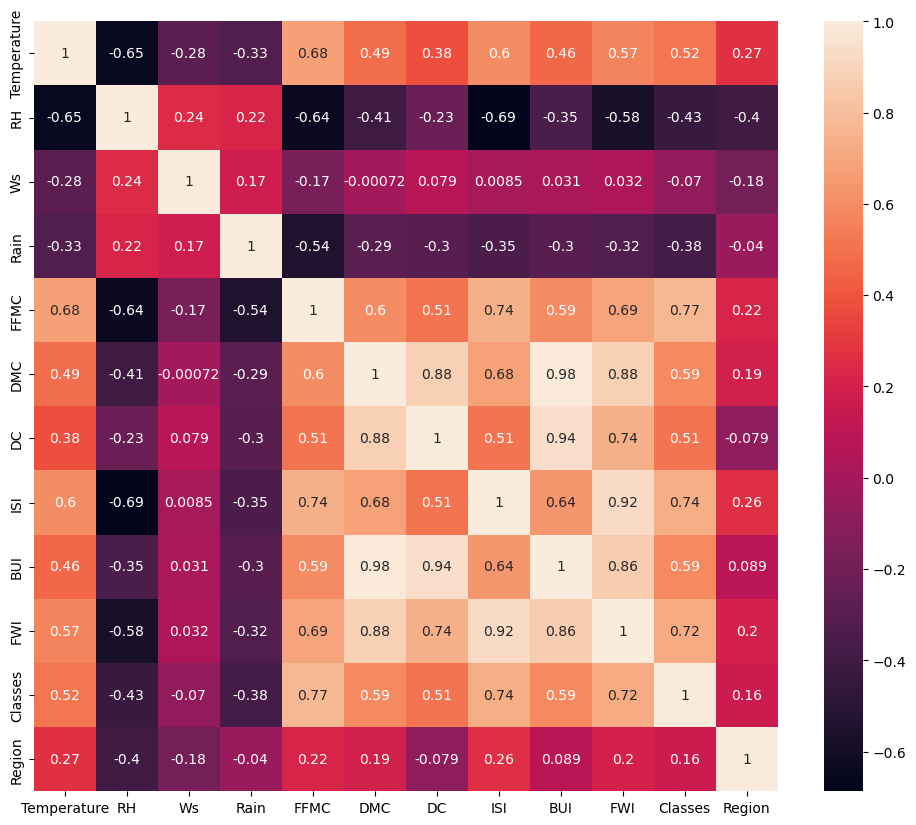

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

### SO WE FINALLY GET THE TWO CATEGORIES THIS IS **FEATURE ENCODING**

In [19]:
# DIVIDE OUR FEATURES IN THR INDEPENDENT AND DEPENDENT FEATURES]
X = df.drop('FWI', axis=1)
y = df['FWI']

In [20]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [21]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [22]:
## TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25 ,random_state=42 )

In [23]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X:  (243, 11)
Shape of y:  (243,)
Shape of X_train:  (182, 11)
Shape of y_train:  (182,)
Shape of X_test:  (61, 11)
Shape of y_test:  (61,)


## FEATURE SELECTION:- Based on corrleation

In [25]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

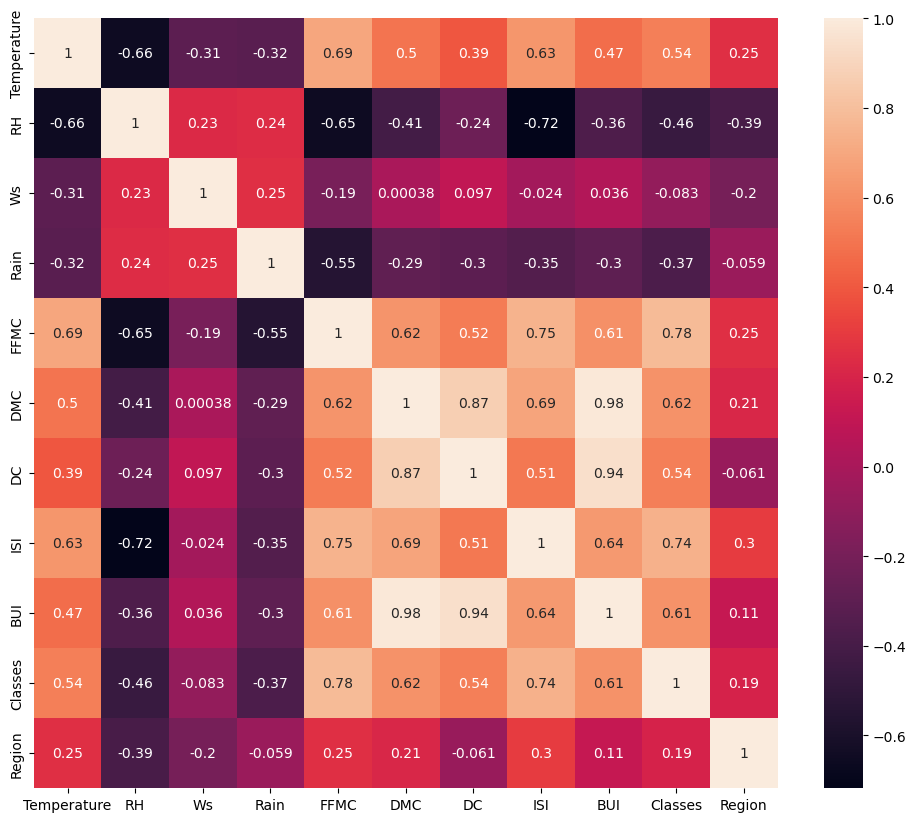

In [26]:
# view visulally
plt.subplots(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [27]:
## FUNCTION FOR FINDING THAT WHICH COLUMNS ARE GIVES MULTICOLLINEARITY ISSUE
# HERE THE THRESHOLD NEEDS SOME DOMAIN EXPERTISE
# set() :- It helps us to give unique names only in the multicollinear column variable
def multicollinearity(dataset,threshold):
    mcoll_col = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[j]
                mcoll_col.add(col_name)
    return mcoll_col            
    

In [29]:
corr_features = multicollinearity(X_train,0.80)
corr_features

{'DC', 'DMC'}

In [35]:
## SO LET'S DROP THE INDEPENDENT FEATURES THAT HAVE CORRELATION MORE THATN .80 AS THEY RISE THE "MULITCOLLINEARITY" ISSUE
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [37]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,2.1,5.6,0,0
141,31,72,14,0.2,60.2,0.8,3.7,0,1
192,40,31,15,0.0,94.2,16.6,22.4,1,1
68,32,60,18,0.3,77.1,2.2,14.1,0,0
119,32,47,14,0.7,77.5,1.8,6.8,0,0


In [45]:
print(X_train.shape)
print(X_test.shape)

(182, 9)
(61, 9)


## FEATURE SCALING OR STANDARDIZATION

In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [54]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -1.10431526, -0.98907071]])

## BOX PLOT TO UNDERSTAND THE EFFECT OF STANDARDIZATION

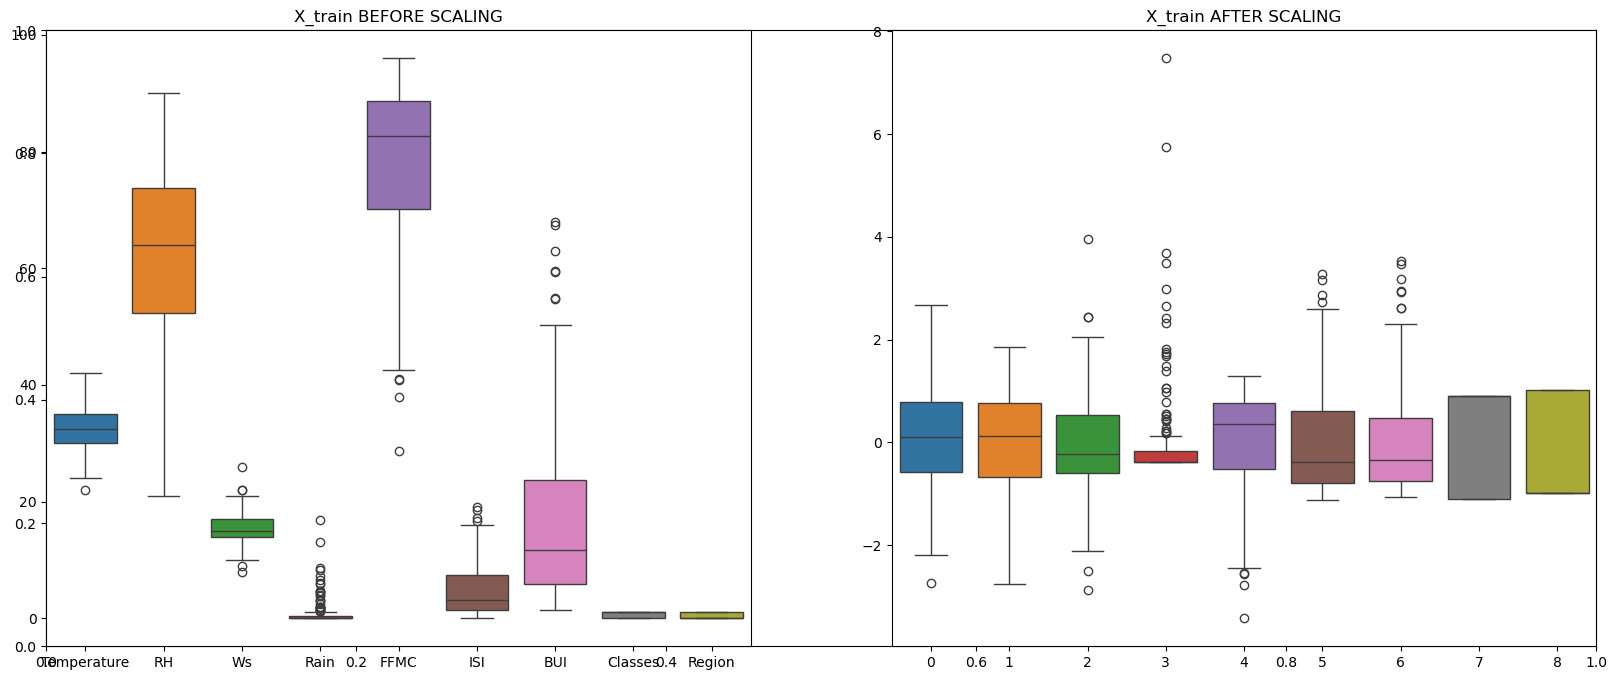

In [58]:
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train BEFORE SCALING")
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaled)
plt.title("X_train AFTER SCALING")
plt.show()

## OBSERVATION:- 
- SO SEE THAT BEFORE SCALING THE FEATRURES RANGE IS DIFFERENT BUT AFTER SCALING THEY GET ALMOST SAME RANGES.
- SEE THAT BEFORE SCALING THE FEATRURES MEAN AND MEDIAN IS RANDOMLY BUT AFTER SCALING THE MEAN AND MEDIAN ALMOST COMES TO ZERO.

# LINEAR MODEL REGRESSION

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [64]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-Squared:- ",score)

Mean Absolute Error:-  0.47398935407627446
R-Squared:-  0.9885461787936621


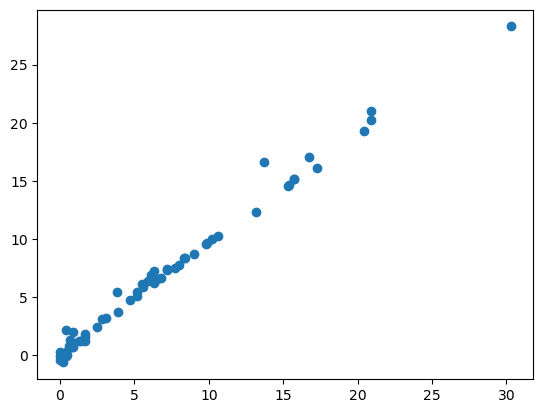

In [66]:
plt.scatter(y_test, y_pred)

## LASSO REGRESSION

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error:-  1.0405718849125525
R-Squared:-  0.9558984658448342


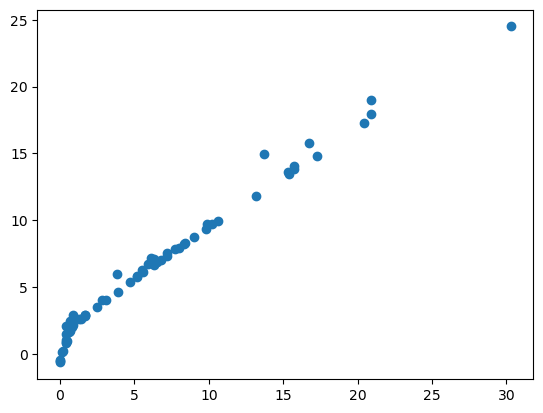

In [71]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-Squared:- ",score)
plt.scatter(y_test, y_pred)

## RIDGE REGRESSION

In [86]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error:-  0.4831648138299023
R-Squared:-  0.9881863986620123


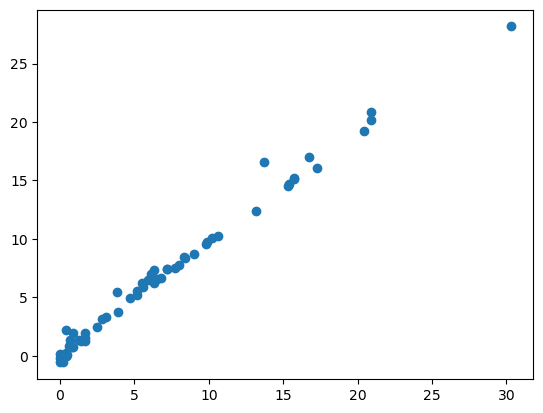

In [88]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-Squared:- ",score)
plt.scatter(y_test, y_pred)

## ELASTICNET REGRESSION

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error:-  1.8346234891165256
R-Squared:-  0.8778093743119115


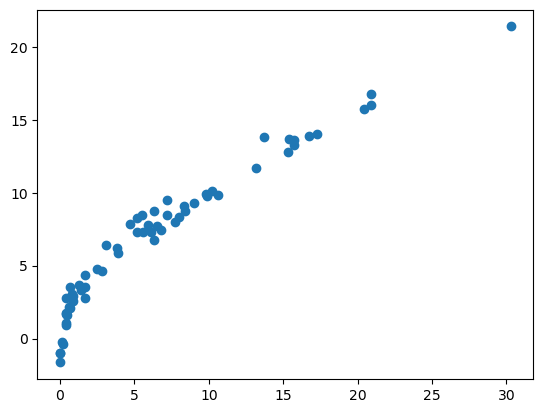

In [104]:
Elasticnet = ElasticNet()
Elasticnet.fit(X_train_scaled,y_train)
y_pred = Elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-Squared:- ",score)
plt.scatter(y_test,y_pred)

# CROSS VALIDATION LASSO

In [74]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [76]:
# IT TAKE THIS ALPHA VALUE FINALLY OUT OF BELOW 100 VALUES BECAUSE IT GIVES HIGHEST ACCURACY WITH THS=IS VALUE
lassocv.alpha_

0.06582808719529475

In [78]:
# IT CHECKED ON THIS 100 ALPHA VALUES AND THIS NUMBER 100 IS DEFAULT SETTED WE CAN CHANGE IT TOO 
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [80]:
# MSE FOR EACH FOLD OF EACH ALPHA VALUE
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [47.26613   , 59.81506814, 49.36616448, 75.6645852 , 35.31758355],
       [41.40197628, 53.9178721 , 42.62662998, 68.35708298, 31.76996123],
       [36.29079716, 48.71817989, 36.84693344, 61.92819453, 28.67296816],
       [31.83511969, 43.80347458, 31.89610181, 56.26841266, 25.96868127],
       [27.94997716, 38.62564602, 27.66155505, 51.28216115, 22.53681293],
       [24.56225298, 34.0989428 , 24.04493218, 46.25876937, 19.37785572],
       [21.6074818 , 30.14005229, 20.96095158, 40.82189611, 16.65829705],
       [19.02983048, 26.67621492, 18.33673046, 36.06710378, 14.31896832],
       [16.78070058, 23.64485516, 16.10815028, 31.90726356, 12.30867857],
       [14.81744382, 20.99065493, 14.22005003, 28.26652442, 10.58289153],
       [13.10396696, 18.66568017, 12.62469821, 25.07880433,  9.10302316],
       [11.6078159 , 16.62816008, 11.28059144, 22.28652528,  7.835618  ],
       [10.30107821, 14.84168967, 10.1

In [82]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-Squared:- ", score)

Mean Absolute Error:-  0.513067480742057
R-Squared:-  0.9868198701992462


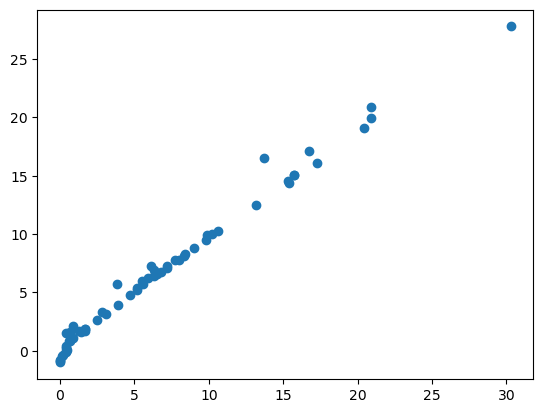

In [84]:
plt.scatter(y_test,y_pred)

## CROSSS VALIDATION RIDGE

In [90]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error:-  0.4831648138299023
R-squared:-  0.9881863986620123


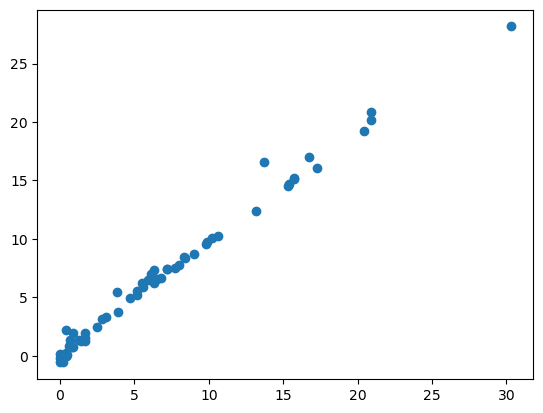

In [92]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-squared:- ", score)
plt.scatter(y_test,y_pred)

In [94]:
ridgecv.alpha_

1.0

In [96]:
ridgecv.coef_

array([-0.0677137 , -0.20431254, -0.08429987,  0.03657435, -0.83496468,
        5.03953011,  3.60563886,  0.30372775, -0.07484464])

In [100]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## CROSS VALIDATION ELASTICNET

In [106]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error:-  0.5647078146997296
R-squared:-  0.9856422182597018


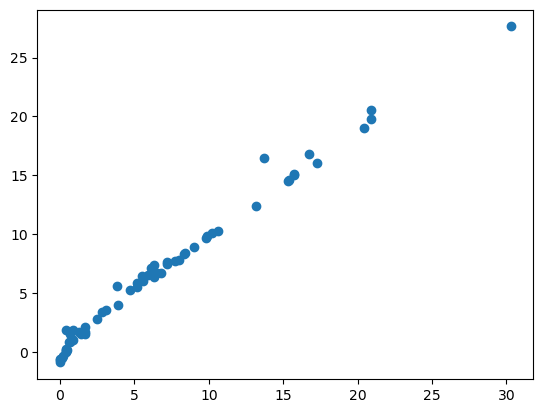

In [108]:
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:- ", mae)
print("R-squared:- ", score)
plt.scatter(y_test,y_pred)

In [109]:
elasticnetcv.alpha_

0.04622700712786237

In [112]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

## PICKLING THE RIDGE REGRESSION AND PREPROCESSING STANDARD SCALER

In [117]:
scaler

StandardScaler()

In [121]:
ridge

Ridge()

In [123]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
